In [ ]:
 
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
import seaborn
plots.style.use('fivethirtyeight')
import numpy as np
import pandas as pd
import io
import datetime
from google.colab import drive

/usr/local/lib/python3.6/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.6/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def intToDate(intdata) :
  tmp = str(intdata)
  convert = datetime.datetime.strptime(tmp, "%Y%m%d").date()
  return convert

def weekNum(x) : 
  return x.strftime("%W")

def weekDay(x) :
  return x.strftime("%a")

In [ ]:
Subway_DF = pd.read_excel('20142204_data1.xlsx')
Subway = Table.from_df(Subway_DF)
Subway = Subway.drop('노선명','역명','등록일자')
Subway

사용일자,승차승객수(백만),하차승객수(백만)
20150101,3.32223,3.29702
20150102,7.15276,7.11681
20150103,5.57613,5.53991
20150104,4.36245,4.3336
20150105,7.89029,7.85551
20150106,7.86799,7.83227
20150107,7.78816,7.7538
20150108,7.82504,7.7899
20150109,8.31102,8.27339
20150110,6.53556,6.49234


# 1. 날짜별 총 승하차 승객수

In [ ]:
Subway1 = Subway.group('사용일자',np.sum)
a = Subway1.column(1)/1000000
b = Subway1.column(2)/1000000
Subway1 = Subway1.with_column('승차승객수(백만)', a).with_column('하차승객수(백만)', b).drop('승차총승객수 sum', '하차총승객수 sum')
Subway1 = Subway1.with_column('Date', Subway1.apply(intToDate, '사용일자')).move_to_start('Date').drop(1,4,5)
Subway1

Date,승차승객수(백만) sum,하차승객수(백만) sum
2015-01-01,3.32223,3.29702
2015-01-02,7.15276,7.11681
2015-01-03,5.57613,5.53991
2015-01-04,4.36245,4.3336
2015-01-05,7.89029,7.85551
2015-01-06,7.86799,7.83227
2015-01-07,7.78816,7.7538
2015-01-08,7.82504,7.7899
2015-01-09,8.31102,8.27339
2015-01-10,6.53556,6.49234


# 2. 날짜별 날씨

In [ ]:
Weather_DF = pd.read_excel('20142204_data2.xlsx')
Weather_DF = Weather_DF.fillna(0)
Weather = Table.from_df(Weather_DF)
Weather

지점,지점명,일시,요일,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),10분 최다강수량 시각(hhmi),1시간 최다강수량(mm),1시간 최다 강수량 시각(hhmi),일강수량(mm),최대 순간 풍속(m/s),최대 순간 풍속 풍향(16방위),최대 순간풍속 시각(hhmi),최대 풍속(m/s),최대 풍속 풍향(16방위),최대 풍속 시각(hhmi),평균 풍속(m/s),풍정합(100m),최다풍향(16방위),일 최심신적설(cm),일 최심신적설 시각(hhmi),일 최심적설(cm),일 최심적설 시각(hhmi),합계 3시간 신적설(cm)
108,서울,2015-01-01 00:00:00,목,-7.7,-9.8,745,-4.3,1500,0,0,0,0,0,0,12.1,270,510,6.5,320,1256,4.6,3999,290,0,0,0,0,0
108,서울,2015-01-02 00:00:00,금,-6,-9,730,-1.9,1513,0,0,0,0,0,0,13,270,1322,6.7,290,1322,3.2,2789,270,0,0,0,0,0
108,서울,2015-01-03 00:00:00,토,-2.7,-9.2,429,3.1,1511,0,0,0,0,0,0,6.7,250,1720,4.4,230,1701,1.9,1678,230,0,0,0,0,0
108,서울,2015-01-04 00:00:00,일,2.5,0.2,534,8.5,1521,0.08,0,0,0,0,0,6.1,70,814,3.7,50,332,2,1758,50,0,0,0,0,0
108,서울,2015-01-05 00:00:00,월,3.7,-1.1,409,7.9,1433,3.83,0,0,0,0,0.4,6.9,70,646,4.4,70,1257,2.4,2087,70,0,0,0,0,0
108,서울,2015-01-06 00:00:00,화,-3.2,-7.6,2346,4,1,3.67,0,0,0,0,3,10.9,270,557,7.3,290,726,4.3,3712,290,0,0,0,0,0
108,서울,2015-01-07 00:00:00,수,-5.5,-8.9,327,-0.6,1529,0,0,0,0,0,0,6.8,270,1450,4.5,320,2123,2.5,2201,270,0,0,0,0,0
108,서울,2015-01-08 00:00:00,목,-5.1,-9.5,732,-0.2,1453,0,0,0,0,0,0,6.7,230,1209,4.8,270,1131,2.2,1884,270,0,0,0,0,0
108,서울,2015-01-09 00:00:00,금,-2.1,-6.8,753,3.5,1518,0,0,0,0,0,0,7.1,250,1614,4.2,290,1415,2,1705,270,0,0,0,0,0
108,서울,2015-01-10 00:00:00,토,-0.3,-5.6,730,4.8,1530,0,0,0,0,0,0,9.5,270,1350,6.3,270,1359,2.3,2024,270,0,0,0,0,0


In [ ]:
Weather = Weather.select('일시', '요일', '평균기온(°C)', '일강수량(mm)')
Weather

일시,요일,평균기온(°C),일강수량(mm)
2015-01-01 00:00:00,목,-7.7,0
2015-01-02 00:00:00,금,-6,0
2015-01-03 00:00:00,토,-2.7,0
2015-01-04 00:00:00,일,2.5,0
2015-01-05 00:00:00,월,3.7,0.4
2015-01-06 00:00:00,화,-3.2,3
2015-01-07 00:00:00,수,-5.5,0
2015-01-08 00:00:00,목,-5.1,0
2015-01-09 00:00:00,금,-2.1,0
2015-01-10 00:00:00,토,-0.3,0


# 3. 데이터병합

In [ ]:
Subway1 = Subway1.with_column('평균기온',Weather.column(2)).with_column('일강수량(mm)', Weather.column(3))
Subway1 = Subway1.relabeled(1, 'On passengers(1M)').relabeled(2, 'Out passengers(1M)').relabeled('평균기온', 'Average Temperatures').relabeled('일강수량(mm)', 'Daily precipitation(mm)')
Subway1['WeekDay'] = Subway1.apply(weekDay, 'Date')
Subway1

Date,On passengers(1M),Out passengers(1M),Average Temperatures,Daily precipitation(mm),WeekDay
2015-01-01,3.32223,3.29702,-7.7,0,Thu
2015-01-02,7.15276,7.11681,-6,0,Fri
2015-01-03,5.57613,5.53991,-2.7,0,Sat
2015-01-04,4.36245,4.3336,2.5,0,Sun
2015-01-05,7.89029,7.85551,3.7,0.4,Mon
2015-01-06,7.86799,7.83227,-3.2,3,Tue
2015-01-07,7.78816,7.7538,-5.5,0,Wed
2015-01-08,7.82504,7.7899,-5.1,0,Thu
2015-01-09,8.31102,8.27339,-2.1,0,Fri
2015-01-10,6.53556,6.49234,-0.3,0,Sat


# 온도에 따른 지하철 탑승객의 변화

- 2015년 한 해 동안 평균 온도와 지하철 이용량
 + 온도가 높은 여름에 이용량이 일부 줄어든 것을 확인

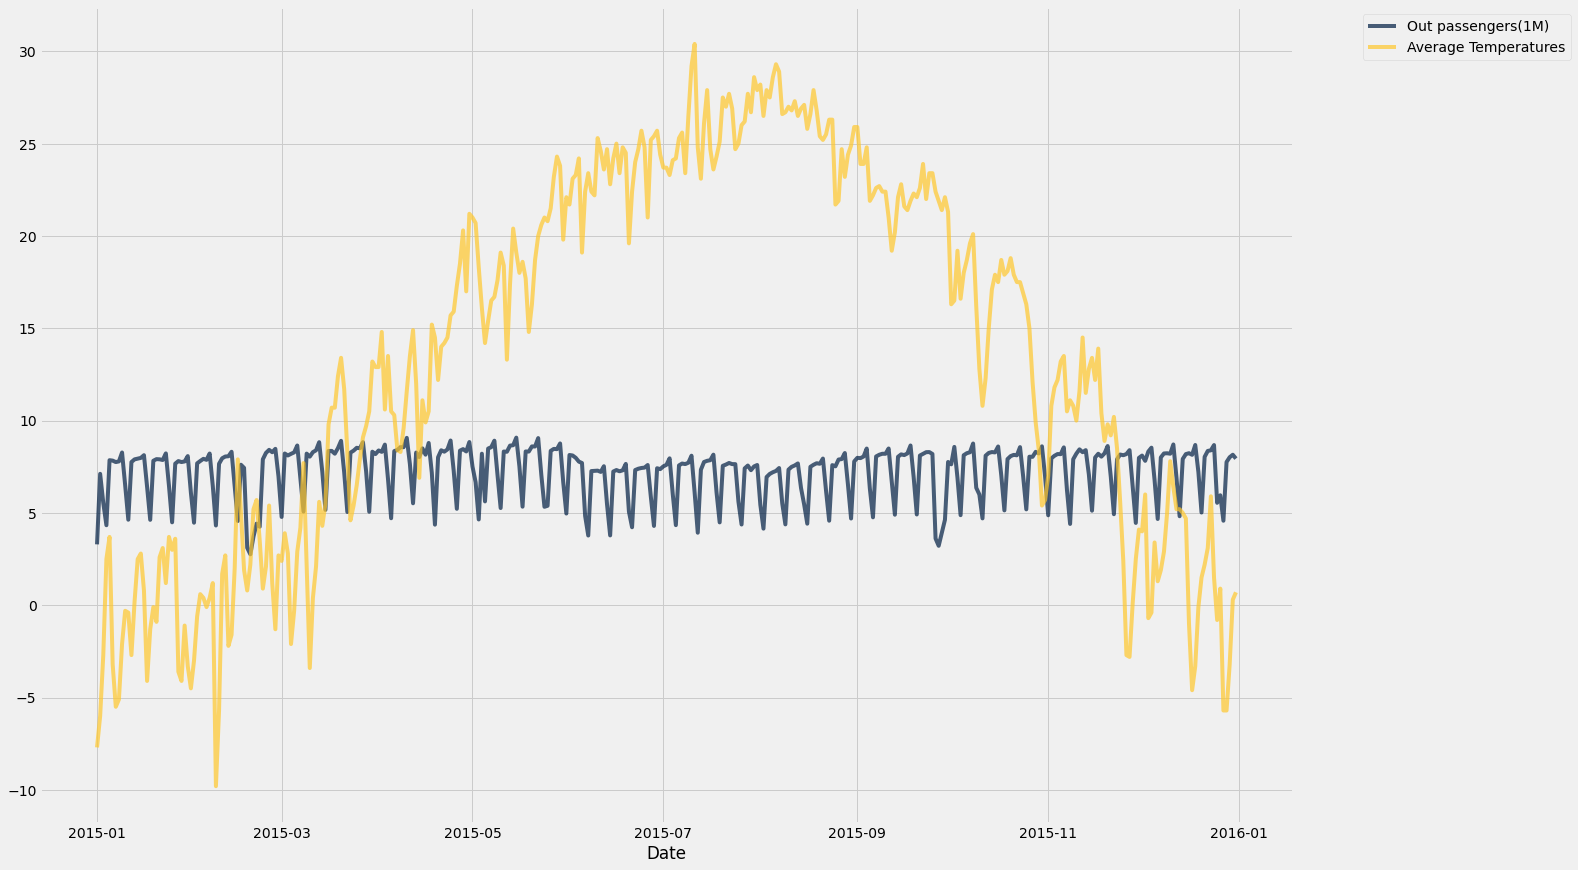

In [ ]:
Subway1.drop(1,3,5).plot('Date', width=20, height=14)

- 온도 분포에 따른 지하철 이용량 변화
 + 2015년 당시 여름과 겨울의 평균 기온은 각각 23.7도, 1.4도
 + 따라서, 24도와 0도를 기준으로 이용량 분포를 확인
 + 위의 주 별 그래프에서 확인한 대로 24도 이상일 때 이용량이 급격히 떨어지는 형태가 나타남
 + 그 외에 0도 이하일 때 이용량이 일부 떨어지는 형태가 나타남

In [ ]:
def tempClass(x) :
  if x < 0 :
    return '-10 ~ 0'
  elif x < 10 :
    return '0 ~ 10'
  elif x < 17 :
    return '10 ~ 17'
  elif x < 24 :
    return '17 ~ 24'
  else :
    return '24 ~ '

(6.0, 8.0)

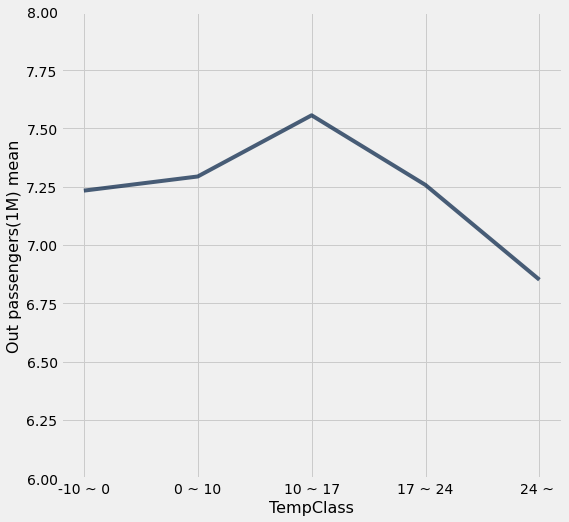

In [ ]:
PassTemp = Subway1.drop(0, 1, 3, 5)
PassTemp['TempClass'] = PassTemp.apply(tempClass, 'Average Temperatures')
PassTemp.drop('Average Temperatures').group('TempClass', np.mean).plot('TempClass', width = 8, height=8)
plots.ylim(6, 8)

# 상관계수



In [ ]:
def standard_units(any_numbers):
  "Convert any array of numbers to standard units."
  return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)

def correlation(t, x, y):
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))

In [ ]:
correlation(Subway1, 'Average Temperatures', 'Out passengers(1M)')

-0.05553954981648205

# 이차식 회귀분석
  - 온도 분포에 따른 이용량의 변화를 봤을때 일차함수의 직선 형태보다는 이차함수의 곡선 형태에 가까움을 확인
  - 따라서 이차식 회귀분석을 사용
  - 데이터 전체를 사용하는 대신 일정한 기준으로 데이터를 분류하여 가장 분포가 넓은 데이터를 사용하기 위해 BoxPlot을 사용하여 기준별 데이터 분포가 넓은 구간을 확인한다.
    + 박스 플롯(box plot)은 데이터의 대략적인 분포와 개별적인 이상치들을 동시에 보여줄 수 있으며 서로 다른 데이터 뭉치를 쉽게 비교할 수 있도록 도와주는 시각화 기법으로 가장 널리 쓰이는 시각화 형태 중 하나이다.

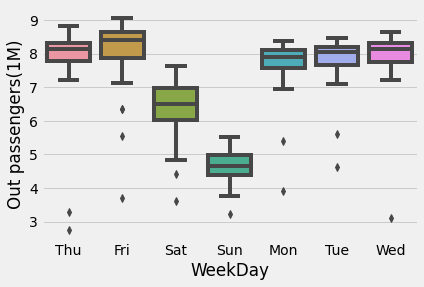

In [ ]:
subwaybox = Subway1.select('WeekDay', 'Out passengers(1M)')
seaborn.boxplot(x='WeekDay', y='Out passengers(1M)', data=Subway1.to_df())

위의 BoxPlot을 보면 토요일이 탑승객 분포가 가장 넓으므로 토요일 탑승객 데이터를 회귀 분석에 사용

In [ ]:
CurveFit = Subway1.where('WeekDay', 'Sat').select(3, 2).relabeled(0, 'Temp Avg').relabeled(1, 'Passenger')
CurveFit

Temp Avg,Passenger
-2.7,5.53991
-0.3,6.49234
-4.1,6.41497
3.7,6.46157
-4.5,6.09716
1.2,6.46208
2,6.44801
5.7,4.42044
2.7,6.97533
4.2,6.85207


2015년 중 매주 토요일의 기온과 지하철 이용량을 토대로 최소제곱법을 이용한 이차식 회귀분석을 위해 함수를 작성

In [ ]:
def quadratic_mse(a, b, c):
    x = CurveFit.column('Temp Avg')
    y = CurveFit.column('Passenger')
    fitted = a*(x**2) + b*x + c
    return np.mean((y - fitted) ** 2)

 minimize 함수를 통해 에러를 최소화하는 이차식의 상수를 탐색하여 best에 저장

In [ ]:
best = minimize(quadratic_mse)
best

array([-4.13600320e-03,  8.35227680e-02,  6.43611455e+00])

사용한 토요일 데이터와 위에서 구한 best의 요소를 가지고 작성한 이차식을 통해 산점도와 회귀 곡선을 표현

(-6.0, 31.0)

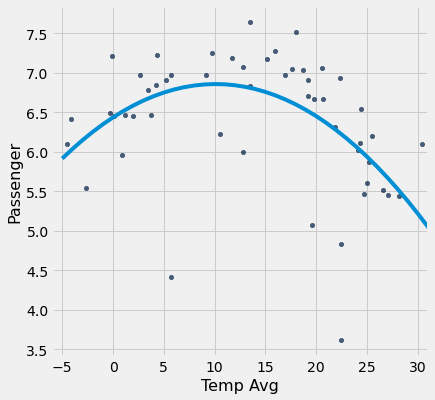

In [ ]:
x = np.arange(-5, 35)
subway_fit = best.item(0)*(x**2) + best.item(1)*x + best.item(2)
CurveFit.scatter(0, width=6, height=6)
plots.plot(x, subway_fit)
plots.xlim(-6, 31)

- 기온이 약 25도 이상인 더운 날씨에 이용량이 급격히 하락
- 0도 이하의 추운 날씨에도 역시 이용량이 하락하는 것을 확인
- 여름이나 겨울에는 학생들의 방학으로 인해 지하철 이용량이 줄어든 것으로 보인다. 온도가 높을때가 낮을때보다 더욱 이용량이 줄어드는 이유는 온도가 높은 여름의 경우 학생뿐만 아니라 직장에서도 휴가등을 떠나는 일이 겨울보다 더 많을것이라 추측된다.